In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

Using TensorFlow backend.


In [2]:
df = pd.read_csv('G:/Software/Machine learning/Datasets/international-airline-passengers.csv')

In [3]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Month                                                                           145 non-null    object 
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.shape

(146, 2)

In [6]:
print(df.iloc[:,1])

0      112.0
1      118.0
2      132.0
3      129.0
4      121.0
       ...  
141    461.0
142    390.0
143    432.0
144      NaN
145      NaN
Name: International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60, Length: 146, dtype: float64


In [7]:
df.isnull().sum()

Month                                                                             1
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    2
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Month                                                                             0
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    0
dtype: int64

In [10]:
df.shape

(144, 2)

In [11]:
l = len(df)
X= np.array([range(1,l)])
Y = np.array([df.iloc[:,1]])

In [12]:
X

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]])

In [13]:
Y

array([[112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
        118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
        114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
        162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
        209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
        272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
        302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
        315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
        318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
        348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
        362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
        342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
        417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
        432.]])

In [14]:
Y= Y[:,0:l-1]
Y

array([[112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
        118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
        114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
        162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
        209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
        272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
        302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
        315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
        318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
        348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
        362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
        342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
        417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.]])

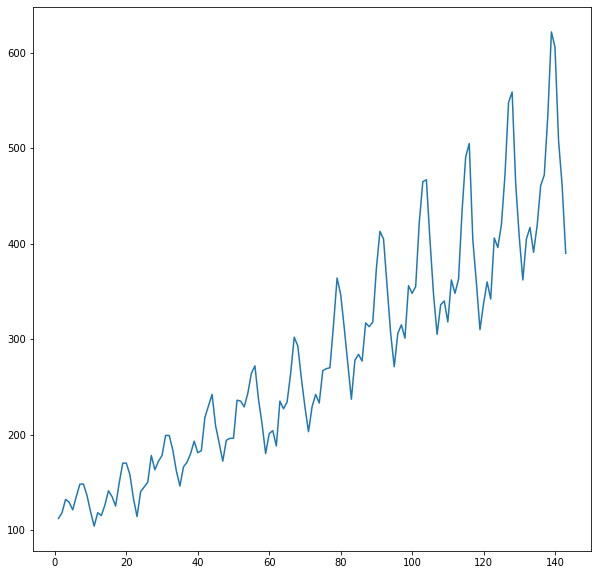

In [15]:
#plt.figure(1)
plt.figure(figsize = (10 , 10))
plt.plot(X[0,:],Y[0,:])
plt.show(block= False)

In [16]:
X1 = Y[:,0:l-4]
X2 = Y[:,1:l-3]
X3 = Y[:,2:l-2]

In [17]:
X1

array([[112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
        118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
        114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
        162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
        209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
        272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
        302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
        315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
        318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
        348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
        362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
        342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
        417., 391., 419., 461., 472., 535., 622., 606.]])

In [18]:
X2

array([[118., 132., 129., 121., 135., 148., 148., 136., 119., 104., 118.,
        115., 126., 141., 135., 125., 149., 170., 170., 158., 133., 114.,
        140., 145., 150., 178., 163., 172., 178., 199., 199., 184., 162.,
        146., 166., 171., 180., 193., 181., 183., 218., 230., 242., 209.,
        191., 172., 194., 196., 196., 236., 235., 229., 243., 264., 272.,
        237., 211., 180., 201., 204., 188., 235., 227., 234., 264., 302.,
        293., 259., 229., 203., 229., 242., 233., 267., 269., 270., 315.,
        364., 347., 312., 274., 237., 278., 284., 277., 317., 313., 318.,
        374., 413., 405., 355., 306., 271., 306., 315., 301., 356., 348.,
        355., 422., 465., 467., 404., 347., 305., 336., 340., 318., 362.,
        348., 363., 435., 491., 505., 404., 359., 310., 337., 360., 342.,
        406., 396., 420., 472., 548., 559., 463., 407., 362., 405., 417.,
        391., 419., 461., 472., 535., 622., 606., 508.]])

In [19]:
X3

array([[132., 129., 121., 135., 148., 148., 136., 119., 104., 118., 115.,
        126., 141., 135., 125., 149., 170., 170., 158., 133., 114., 140.,
        145., 150., 178., 163., 172., 178., 199., 199., 184., 162., 146.,
        166., 171., 180., 193., 181., 183., 218., 230., 242., 209., 191.,
        172., 194., 196., 196., 236., 235., 229., 243., 264., 272., 237.,
        211., 180., 201., 204., 188., 235., 227., 234., 264., 302., 293.,
        259., 229., 203., 229., 242., 233., 267., 269., 270., 315., 364.,
        347., 312., 274., 237., 278., 284., 277., 317., 313., 318., 374.,
        413., 405., 355., 306., 271., 306., 315., 301., 356., 348., 355.,
        422., 465., 467., 404., 347., 305., 336., 340., 318., 362., 348.,
        363., 435., 491., 505., 404., 359., 310., 337., 360., 342., 406.,
        396., 420., 472., 548., 559., 463., 407., 362., 405., 417., 391.,
        419., 461., 472., 535., 622., 606., 508., 461.]])

In [20]:
print(X1.shape ,X2.shape ,X3.shape )

(1, 140) (1, 140) (1, 140)


In [21]:
X = np.concatenate([X1 , X2 , X3] , axis = 0)
X = np.transpose(X)

In [22]:
X

array([[112., 118., 132.],
       [118., 132., 129.],
       [132., 129., 121.],
       [129., 121., 135.],
       [121., 135., 148.],
       [135., 148., 148.],
       [148., 148., 136.],
       [148., 136., 119.],
       [136., 119., 104.],
       [119., 104., 118.],
       [104., 118., 115.],
       [118., 115., 126.],
       [115., 126., 141.],
       [126., 141., 135.],
       [141., 135., 125.],
       [135., 125., 149.],
       [125., 149., 170.],
       [149., 170., 170.],
       [170., 170., 158.],
       [170., 158., 133.],
       [158., 133., 114.],
       [133., 114., 140.],
       [114., 140., 145.],
       [140., 145., 150.],
       [145., 150., 178.],
       [150., 178., 163.],
       [178., 163., 172.],
       [163., 172., 178.],
       [172., 178., 199.],
       [178., 199., 199.],
       [199., 199., 184.],
       [199., 184., 162.],
       [184., 162., 146.],
       [162., 146., 166.],
       [146., 166., 171.],
       [166., 171., 180.],
       [171., 180., 193.],
 

In [23]:
X.shape

(140, 3)

In [24]:
Y = np.transpose(Y[:,3:l-1])
Y

array([[129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [302.],
       [293.],
       [259.],
       [22

In [25]:
print(X.shape, Y.shape)

(140, 3) (140, 1)


In [26]:
scaler = MinMaxScaler()
scaler.fit(X)
X= scaler.transform(X)

In [27]:
X

array([[0.01544402, 0.02702703, 0.05405405],
       [0.02702703, 0.05405405, 0.04826255],
       [0.05405405, 0.04826255, 0.03281853],
       [0.04826255, 0.03281853, 0.05984556],
       [0.03281853, 0.05984556, 0.08494208],
       [0.05984556, 0.08494208, 0.08494208],
       [0.08494208, 0.08494208, 0.06177606],
       [0.08494208, 0.06177606, 0.02895753],
       [0.06177606, 0.02895753, 0.        ],
       [0.02895753, 0.        , 0.02702703],
       [0.        , 0.02702703, 0.02123552],
       [0.02702703, 0.02123552, 0.04247104],
       [0.02123552, 0.04247104, 0.07142857],
       [0.04247104, 0.07142857, 0.05984556],
       [0.07142857, 0.05984556, 0.04054054],
       [0.05984556, 0.04054054, 0.08687259],
       [0.04054054, 0.08687259, 0.12741313],
       [0.08687259, 0.12741313, 0.12741313],
       [0.12741313, 0.12741313, 0.1042471 ],
       [0.12741313, 0.1042471 , 0.05598456],
       [0.1042471 , 0.05598456, 0.01930502],
       [0.05598456, 0.01930502, 0.06949807],
       [0.

In [28]:
scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y= scaler1.transform(Y)

In [29]:
# Create ANN model

model = Sequential()

model.add(Dense(32 , activation = 'relu' , input_dim = 3))
model.add(Dense(32 , activation = 'relu'))

model.add(Dense(1 , activation = 'sigmoid'))

In [30]:
model.compile(loss = 'mean_squared_error' , optimizer='rmsprop' , metrics = [metrics.mae])

In [31]:
model.fit(X , Y , epochs = 500 , batch_size = 30 , verbose = 2)

Epoch 1/500
 - 0s - loss: 0.0746 - mean_absolute_error: 0.2331
Epoch 2/500
 - 0s - loss: 0.0686 - mean_absolute_error: 0.2237
Epoch 3/500
 - 0s - loss: 0.0638 - mean_absolute_error: 0.2154
Epoch 4/500
 - 0s - loss: 0.0597 - mean_absolute_error: 0.2079
Epoch 5/500
 - 0s - loss: 0.0554 - mean_absolute_error: 0.2000
Epoch 6/500
 - 0s - loss: 0.0512 - mean_absolute_error: 0.1917
Epoch 7/500
 - 0s - loss: 0.0469 - mean_absolute_error: 0.1832
Epoch 8/500
 - 0s - loss: 0.0425 - mean_absolute_error: 0.1737
Epoch 9/500
 - 0s - loss: 0.0381 - mean_absolute_error: 0.1638
Epoch 10/500
 - 0s - loss: 0.0343 - mean_absolute_error: 0.1560
Epoch 11/500
 - 0s - loss: 0.0304 - mean_absolute_error: 0.1449
Epoch 12/500
 - 0s - loss: 0.0268 - mean_absolute_error: 0.1362
Epoch 13/500
 - 0s - loss: 0.0236 - mean_absolute_error: 0.1270
Epoch 14/500
 - 0s - loss: 0.0205 - mean_absolute_error: 0.1175
Epoch 15/500
 - 0s - loss: 0.0178 - mean_absolute_error: 0.1097
Epoch 16/500
 - 0s - loss: 0.0158 - mean_absolute

Epoch 129/500
 - 0s - loss: 0.0035 - mean_absolute_error: 0.0467
Epoch 130/500
 - 0s - loss: 0.0039 - mean_absolute_error: 0.0496
Epoch 131/500
 - 0s - loss: 0.0037 - mean_absolute_error: 0.0468
Epoch 132/500
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0476
Epoch 133/500
 - 0s - loss: 0.0036 - mean_absolute_error: 0.0481
Epoch 134/500
 - 0s - loss: 0.0036 - mean_absolute_error: 0.0464
Epoch 135/500
 - 0s - loss: 0.0035 - mean_absolute_error: 0.0462
Epoch 136/500
 - 0s - loss: 0.0035 - mean_absolute_error: 0.0459
Epoch 137/500
 - 0s - loss: 0.0037 - mean_absolute_error: 0.0466
Epoch 138/500
 - 0s - loss: 0.0036 - mean_absolute_error: 0.0476
Epoch 139/500
 - 0s - loss: 0.0035 - mean_absolute_error: 0.0468
Epoch 140/500
 - 0s - loss: 0.0036 - mean_absolute_error: 0.0478
Epoch 141/500
 - 0s - loss: 0.0035 - mean_absolute_error: 0.0465
Epoch 142/500
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0483
Epoch 143/500
 - 0s - loss: 0.0035 - mean_absolute_error: 0.0465
Epoch 144/500
 - 0s - los

 - 0s - loss: 0.0033 - mean_absolute_error: 0.0456
Epoch 256/500
 - 0s - loss: 0.0034 - mean_absolute_error: 0.0453
Epoch 257/500
 - 0s - loss: 0.0033 - mean_absolute_error: 0.0459
Epoch 258/500
 - 0s - loss: 0.0033 - mean_absolute_error: 0.0457
Epoch 259/500
 - 0s - loss: 0.0035 - mean_absolute_error: 0.0469
Epoch 260/500
 - 0s - loss: 0.0040 - mean_absolute_error: 0.0496
Epoch 261/500
 - 0s - loss: 0.0034 - mean_absolute_error: 0.0463
Epoch 262/500
 - 0s - loss: 0.0033 - mean_absolute_error: 0.0452
Epoch 263/500
 - 0s - loss: 0.0034 - mean_absolute_error: 0.0460
Epoch 264/500
 - 0s - loss: 0.0033 - mean_absolute_error: 0.0456
Epoch 265/500
 - 0s - loss: 0.0033 - mean_absolute_error: 0.0459
Epoch 266/500
 - 0s - loss: 0.0036 - mean_absolute_error: 0.0469
Epoch 267/500
 - 0s - loss: 0.0034 - mean_absolute_error: 0.0454
Epoch 268/500
 - 0s - loss: 0.0034 - mean_absolute_error: 0.0454
Epoch 269/500
 - 0s - loss: 0.0035 - mean_absolute_error: 0.0467
Epoch 270/500
 - 0s - loss: 0.0036 - me

Epoch 382/500
 - 0s - loss: 0.0034 - mean_absolute_error: 0.0466
Epoch 383/500
 - 0s - loss: 0.0033 - mean_absolute_error: 0.0455
Epoch 384/500
 - 0s - loss: 0.0032 - mean_absolute_error: 0.0453
Epoch 385/500
 - 0s - loss: 0.0034 - mean_absolute_error: 0.0469
Epoch 386/500
 - 0s - loss: 0.0034 - mean_absolute_error: 0.0463
Epoch 387/500
 - 0s - loss: 0.0034 - mean_absolute_error: 0.0450
Epoch 388/500
 - 0s - loss: 0.0037 - mean_absolute_error: 0.0482
Epoch 389/500
 - 0s - loss: 0.0033 - mean_absolute_error: 0.0458
Epoch 390/500
 - 0s - loss: 0.0034 - mean_absolute_error: 0.0450
Epoch 391/500
 - 0s - loss: 0.0034 - mean_absolute_error: 0.0465
Epoch 392/500
 - 0s - loss: 0.0033 - mean_absolute_error: 0.0451
Epoch 393/500
 - 0s - loss: 0.0033 - mean_absolute_error: 0.0458
Epoch 394/500
 - 0s - loss: 0.0033 - mean_absolute_error: 0.0449
Epoch 395/500
 - 0s - loss: 0.0033 - mean_absolute_error: 0.0452
Epoch 396/500
 - 0s - loss: 0.0033 - mean_absolute_error: 0.0457
Epoch 397/500
 - 0s - los

In [32]:
predict = model.predict(X , verbose = 1)
print(Y,predict)

140/140 [==============================] - 0s 199us/step
[[0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1

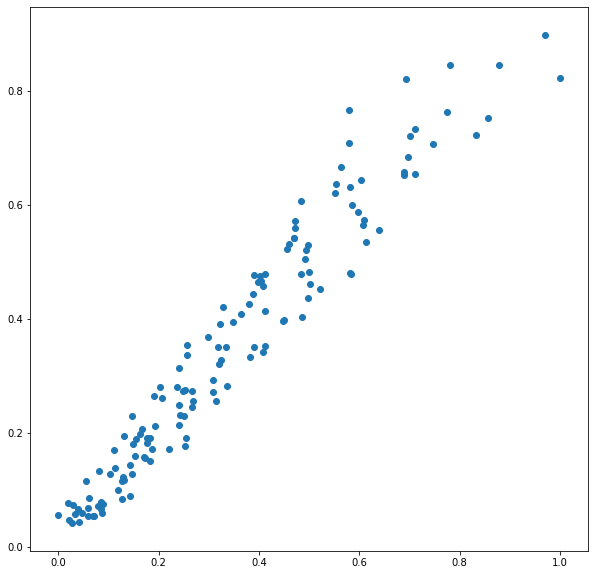

In [33]:
plt.figure(figsize = (10 , 10))
plt.scatter(Y,predict)
plt.show(block=False)

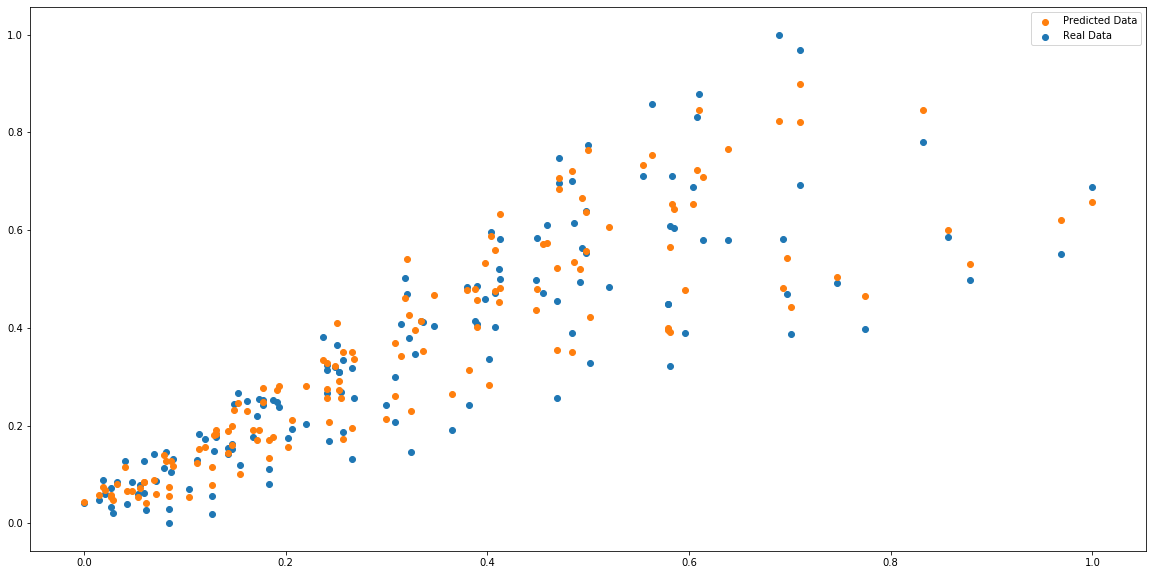

In [34]:
#plt.figure(3)
plt.figure(figsize = (20 , 10))
Test= plt.scatter(X[:,0],Y)
Predict = plt.scatter(X[:,0],predict)
plt.legend([Predict,Test],["Predicted Data","Real Data"])
plt.show()